<a href="https://colab.research.google.com/github/ReyesGus/geiser/blob/main/geiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reyes Romero Gustavo

1718110984

IDGS 91

Entrenamiento no supervisado

importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Versiones

In [2]:
print("Pandas {}".format(pd.__version__))
print("Numpy{}".format(np.__version__))
print("matplotlib{}".format(matplotlib.__version__))
print("sklearn{}".format(sklearn.__version__))

Pandas 1.1.5
Numpy1.19.5
matplotlib3.2.2
sklearn1.0.1


Dataset

In [3]:
df = pd.read_csv("geisers.csv")

Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [5]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [6]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


Dataframe Grafica

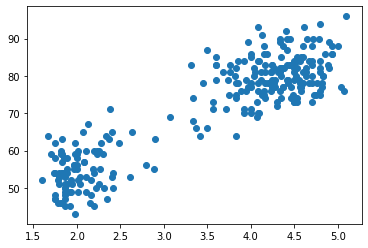

In [7]:
plt.scatter(df['TimeEruption'],df['TimeWaiting'])
plt.show()

Datos

In [8]:
model = KMeans(n_clusters=4,max_iter=100)

Datos estandarizados 

In [9]:
df = StandardScaler().fit_transform(df)

Valores estandarizados

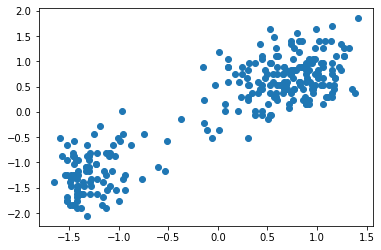

In [10]:
plt.scatter(df[:,0],df[:,1])
plt.show()

Entrenamiento

In [11]:
model.fit(df)

KMeans(max_iter=100, n_clusters=4)

centroides datos

In [14]:
centroids = model.cluster_centers_
centroids

array([[ 0.42228532,  0.30345458],
       [-1.19357662, -0.79763596],
       [ 0.88086224,  0.89735086],
       [-1.33017137, -1.50968349]])

Etiquetas

In [12]:
model.labels_


array([0, 3, 0, 1, 2, 1, 2, 2, 3, 2, 3, 2, 0, 3, 2, 3, 1, 2, 3, 2, 3, 3,
       0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 3, 3, 2, 1, 2, 2, 1, 2, 1,
       0, 0, 0, 3, 2, 1, 2, 2, 3, 2, 3, 2, 0, 1, 2, 2, 1, 2, 3, 2, 1, 2,
       0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 2, 0, 3, 2, 1, 2, 3, 2, 2, 3, 2, 3, 2, 0,
       2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 3, 0, 0, 1, 2, 0, 3, 2, 1, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 0, 2, 1, 2, 2, 0, 1, 2, 3, 2, 3, 2, 0, 1, 2,
       0, 0, 2, 2, 3, 2, 3, 2, 1, 0, 0, 2, 1, 2, 3, 2, 3, 1, 2, 0, 2, 2,
       0, 3, 2, 0, 3, 2, 2, 0, 3, 2, 2, 3, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0,
       3, 2, 1, 2, 2, 3, 2, 3, 0, 2, 3, 2, 1, 2, 3, 0, 0, 0, 3, 2, 3, 0,
       3, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 3, 2, 3, 2, 3, 3, 0, 0, 1, 0, 3,
       2, 1, 2, 0, 1, 2, 1, 0, 3, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2,
       3, 1, 2, 2, 3, 2, 3, 0], dtype=int32)

Centroides

<function matplotlib.pyplot.show>

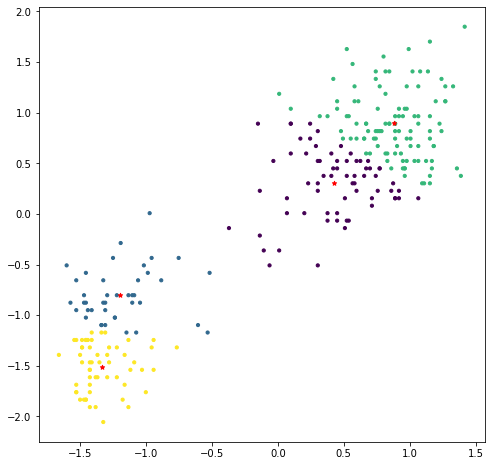

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=20,label="centroids")
plt.show

Predicciones

In [16]:
new_label = model.predict([[0.5,-1.5]])
new_label[0]

0

Numero clusters

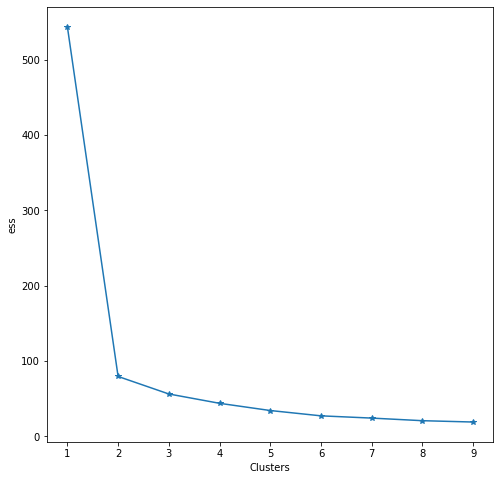

In [17]:
ess = [] 
list_k = list(range(1,10))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  ess.append(model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(list_k,ess,"-*")
plt.xlabel("Clusters")
plt.ylabel("ess")
plt.show()

 Clusters distintos

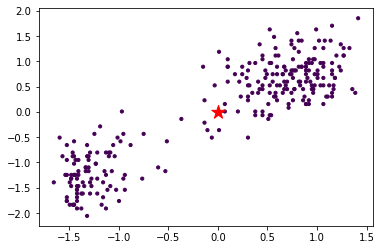

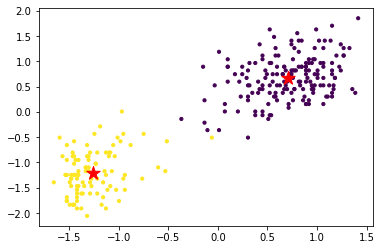

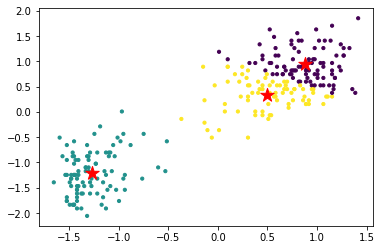

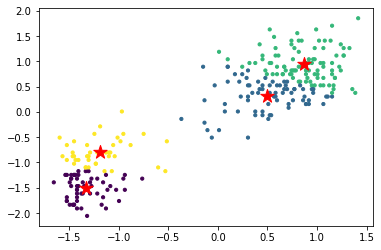

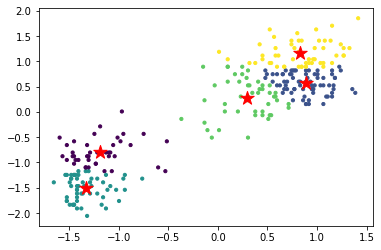

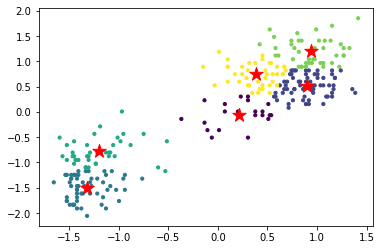

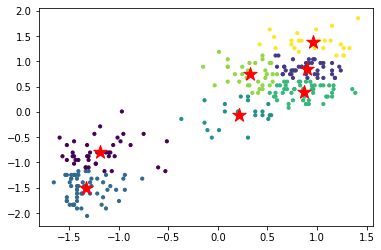

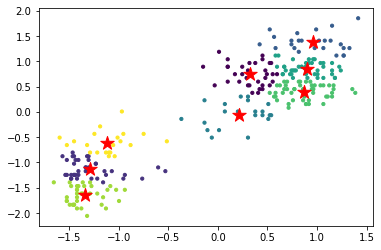

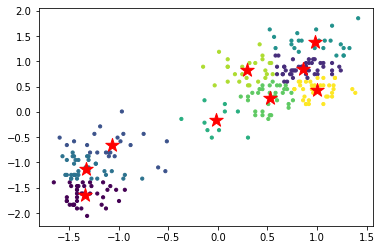

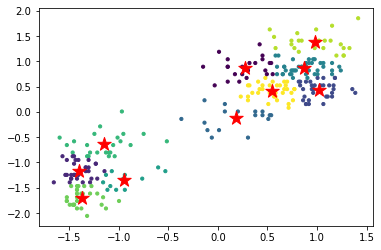

In [18]:
list_k = list(range(1,11))

for k in list_k:
  model = KMeans(n_clusters=k)
  model.fit(df)
  centroids = model.cluster_centers_
  plt.scatter(df[:,0],df[:,1], c=model.labels_.astype(float),s=10,label="clusters")
  plt.scatter(centroids[:,0],centroids[:,1],c='red',marker="*",s=200,label="centroides")
  plt.show()

Conclusión

El buen manejo de datos te permite ser más eficiente en el uso de los recursos que tienes, independientemente del tamaño de la empresa o proyecto, es necesario conocer la cantidad de recursos con los que se cuenta: tiempo, dinero, material; todas estos puntos son vitales para una empresa, así que hay que prestarles atención.